## **<center>Linear Regression Model_Prediction of Medical Charges</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.**[**Importing Libraries**](#Section3)<br>
  
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>
  - **4.2** [**Data Information**](#Section42)<br>
  
**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Handling of Redundant Data**](#Section52)
  - **5.3** [**Handling of Categorical Data**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Preparation**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Linear Regression** is a supervised and statistical method used for modeling and analyzing the relationship between a dependent variable (also called the target) and one or more independent variables (predictors or features). It assumes a linear relationship between the variables.

- **Linear regression** is widely used in various fields, including economics, finance, biology, and social sciences, for tasks such as predicting stock prices, analyzing the impact of marketing campaigns, studying the relationship between variables, and more.

- The primary goal of this technique is to find the best-fitting linear equation that describes the relationship between the variables. This equation can be used to make predictions and understand the strength and direction of the relationship. Hence, the name is **Linear Regression**.

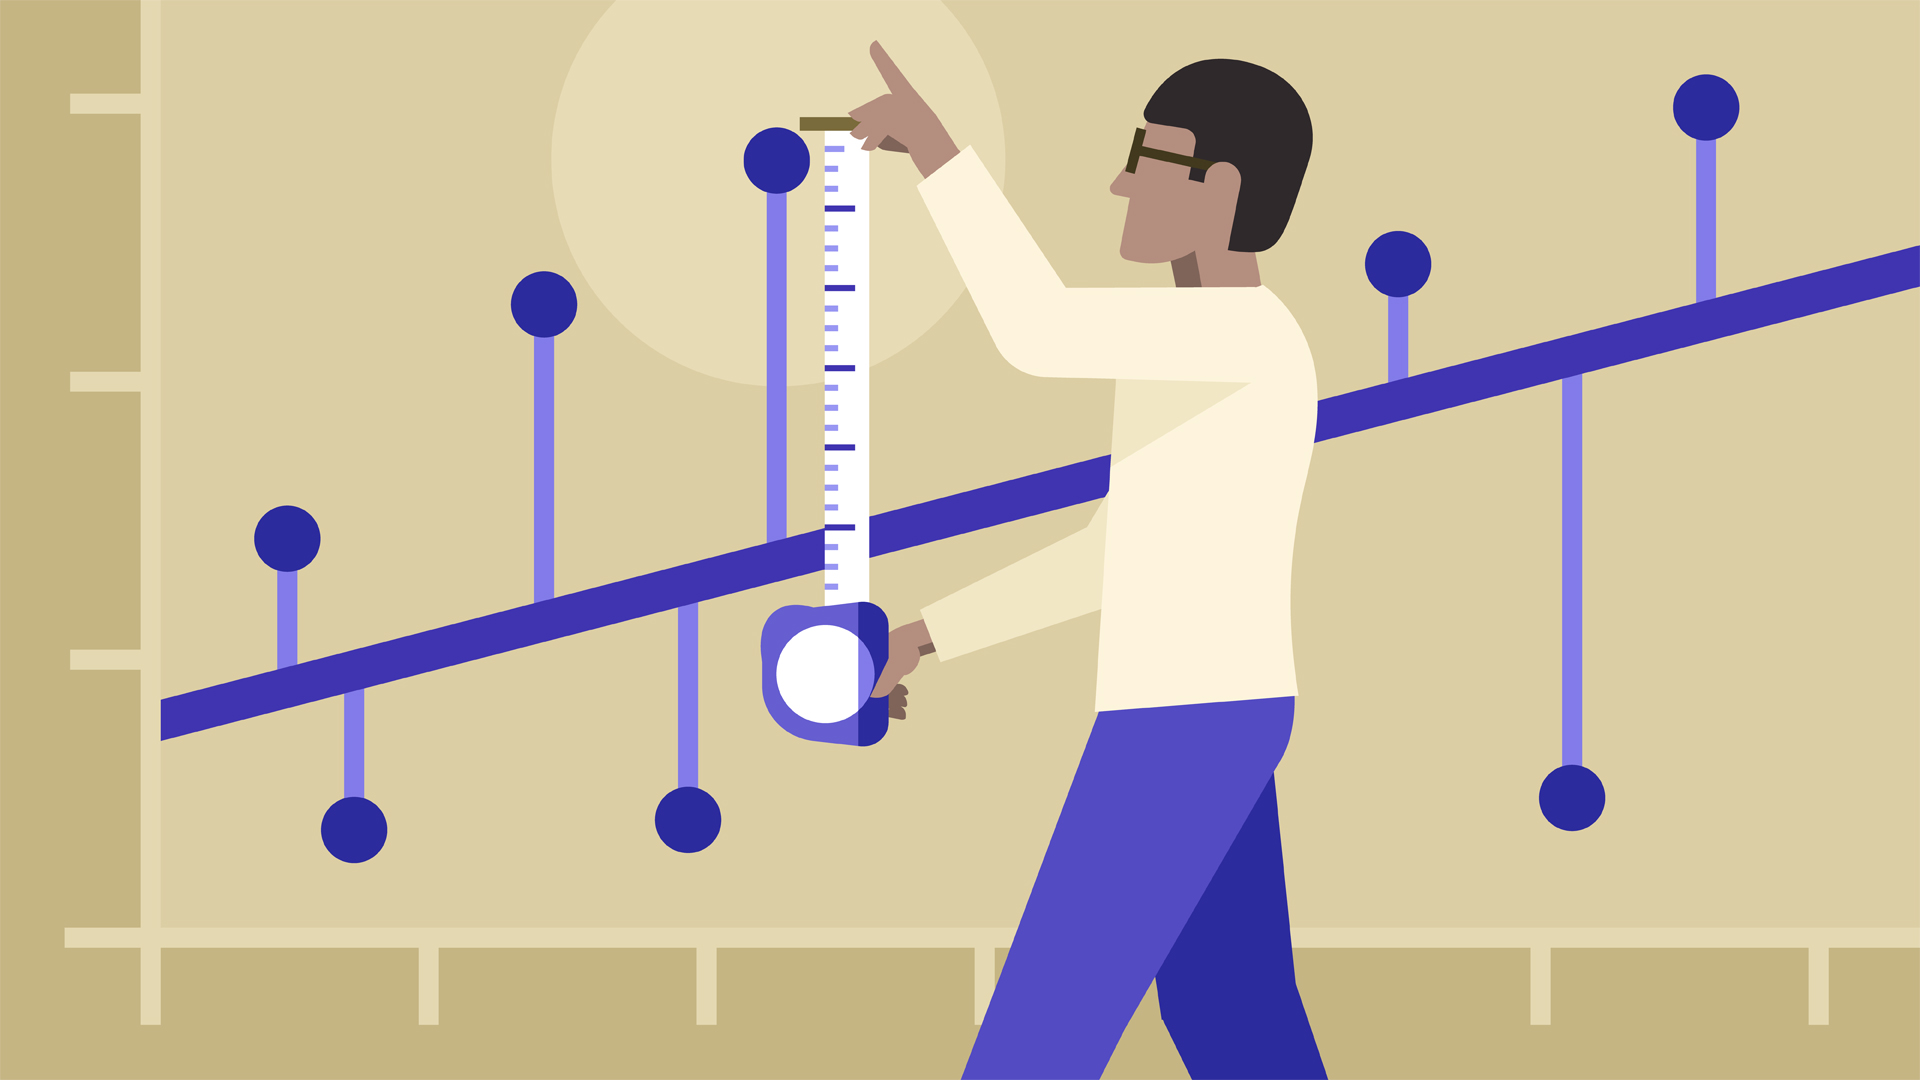

- Linear regression can be denoted by the equation:
<center><h4>$y$= $b0$ + $b1$ * $X$</h4></center>

- So if **remuneration** is **linearly dependent** on **years of experience**, we can **predict someone's remuneration**  using this method:

<center><h4>$salary$= $b0$ + $b1$ * $years\_of\_experience$</h4></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- In order to be profitable, a healthcare insurance company must generate revenue exceeding its expenses related to the healthcare of policyholders. The unpredictability of medical costs, largely stemming from infrequent occurrences of severe health conditions, poses a significant challenge.

- Examine the company's historical data, with the primary goal to develop a regression model that can effectively forecast medical charges and assess the model's prediction accuracy.

- Furthermore, identify the specific factors or features that exert the most influence on medical charges and providing an in-depth analysis of their impact.

---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
# Importing warning to disable runtime warnings
import warnings
# Warnings will appear only once
warnings.filterwarnings("ignore")
#--------------------------------------------------------------------------------------------------------------------------
# Importing for panel data analysis
import pandas as pd
#--------------------------------------------------------------------------------------------------------------------------
# Importing package numpys (For Numerical Python)
import numpy as np
#--------------------------------------------------------------------------------------------------------------------------
# Importing seaborn library for interactive visualization
import seaborn as sns
#--------------------------------------------------------------------------------------------------------------------------
# Importing pyplot interface of matplotlib
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------------------------------------------------
# Importing plotly library for visualization
import plotly.graph_objects as go

In [2]:
# To split the data in training and testing part
from sklearn.model_selection import train_test_split 

# Importing Standard Scaler library from preprocessing
from sklearn.preprocessing import StandardScaler

# Importing Linear Regression model
from sklearn.linear_model import LinearRegression 

# To calculate the MSE of a regression model
from sklearn.metrics import mean_squared_error

# To calculate the MAE of a regression model
from sklearn.metrics import mean_absolute_error 

# To calculate the R-squared score of a regression model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Standardizing training set and testing set
from sklearn.preprocessing import StandardScaler, MinMaxScaler

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set is acquired from the **cancer.gov and the US Census American Community Survey** for the purpose of **analysis & prediction**.


</br>

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 1338 | 7 | 73.3+ KB |

</br>


|Id|Feature|Description|
|:--:|:--:|:--|
|01|**age**| Age of primary beneficiary|
|02|**sex**| Insurance contractor gender, female, male|
|03|**bmi**| Body mass index|
|04|**children**| Number of dependents|
|05|**smoker**| Smoking|
|06|**region**| Beneficiary's residential area in the US|
|07|**charges**| Individual medical costs billed by health insurance|

In [3]:
# reading the file from its source and assigning
data = pd.read_csv(r'https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%204%20ML1/Module%202%20Linear%20Reg/insurance_new_1_.csv')
# checking the shape of the dataset
data.shape
# checking the 1st 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [4]:
# checking the basic statictics of the numerical features
data.describe()

,age,bmi,children,charges
count,1333.000000,1338.000000,1338.000000,1338.000000
mean,39.228807,30.663397,1.094918,13270.422265
std,14.070906,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**:

- **charges** for some customers ranging from as **low** as a **\$1100** dollars to as **high** as **\$63770** dollars.

- The **maximum** of age is found to be **64 years** whereas minimum age is around **18 years**.

- **More than 50%** of the customers have their **BMI** above **30**.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [6]:
# useful method to quickly understand the structure and composition of the DataFrame
# including information about the data types, non-null values, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Observations**:

- Out of 7 features, we have **1 int64 datatype** features(children), **3 float64 datatype** features (age, bmi and charges), and the **rest are of object** datatype features.
- Feature **age** is required to be convert to datatype **int** and also has 5 missing values that should be filled in.
- We also need to **convert some categorical variables** like region into numeric form in order to use them for training purposes.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [7]:
# keeping the original dataset intact & creating a copy for performing further analysis
cancer_us_census = data.copy()

<a name = Section51></a>
### **5.1 Handling of Missing Data**

- Performing data cleaning operations on the data basis the observations made above.

|Feature|Object Type|Solution|
|:--:|:--:|:--|
|age|float64|Replace with Median|

In [8]:
# filling 5 missing values in age features with median age
cancer_us_census['age'] = cancer_us_census['age'].fillna(cancer_us_census['age'].median())

In [9]:
# converting datatype to int
cancer_us_census['age'] = cancer_us_census['age'].astype(int)

In [10]:
# re-verifying the changes made above
cancer_us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int32  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 68.1+ KB


<a name = Section52></a>
### **5.2 Handling of Redundant Data**

- In this section, we will identify redundant data and take appropriate action.

In [11]:
# re-verifying the changes made above
cancer_us_census.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [12]:
# checking for any duplicated rows
cancer_us_census.duplicated().any()

True

In [13]:
# displaying the duplicated rows for further analysis
cancer_us_census.loc[cancer_us_census.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
# dropping duplicated index 581 from the dataset
cancer_us_census = cancer_us_census.drop(581, axis = 0)

In [15]:
# verifying the changes made
cancer_us_census.duplicated().any()

False

<a name = Section53></a>
### **5.3 Handling of Categorical Data**

- We will now convert categorical data to numerical data

In [17]:
# creating dummy variables for categorical features
cancer_us_census = pd.get_dummies(data = cancer_us_census, columns=['sex','smoker', 'region'], drop_first=True)

In [18]:
cancer_us_census.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question :**Check the **correlation** between the **numerical features**.</h4>

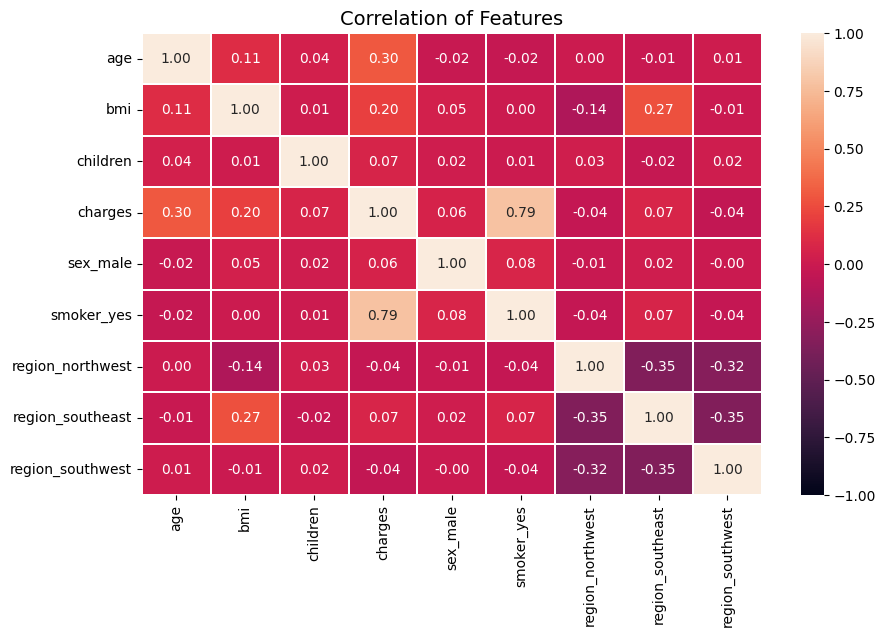

In [19]:
# checking the co-relation between numerical features for further analysis
plt.figure(figsize=(10, 6))

# creating correlation matix feature
correlation_matrix = cancer_us_census.corr()

# plotting a heatmap for visualtization
sns.heatmap(correlation_matrix, annot=True, vmax = 1, vmin = -1, fmt='.2f', linewidths=0.07)

# adding some asthetics
plt.title('Correlation of Features', size=14)
plt.show()

In [20]:
# dropping 'sex_male' feature as it's not useful towards the objective
cancer_us_census.drop(cancer_us_census[['sex_male']], axis=1, inplace = True)

In [21]:
# checking the changes made
cancer_us_census.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0
2,28,33.000,3,4449.46200,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,0



---
**<h4>Question :**Compare the **distribution** of the **number of children**.</h4>

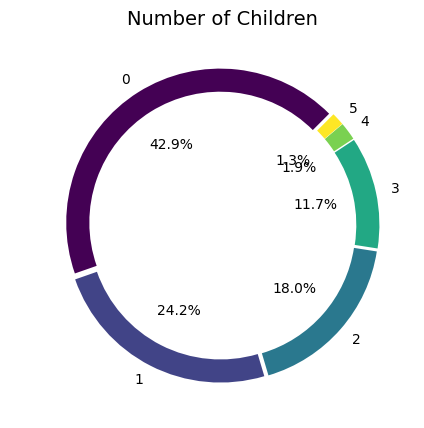

In [45]:
# creating a canvas
plt.figure(figsize=(10, 5))

# creating a pie plot to display distribution of children feature
space = np.ones(cancer_us_census['children'].nunique())/45
cancer_us_census['children'].value_counts().plot(kind = 'pie', explode = space,
                                          autopct = '%.1f%%', wedgeprops = dict(width = 0.15),
                                          startangle = 45, cmap = 'viridis')

# adding some cosmetics
plt.ylabel(' ')
plt.title(label='Number of Children', size=14)

plt.show()


---
**<h4>Question:** Compare the **distribution** of Charges.


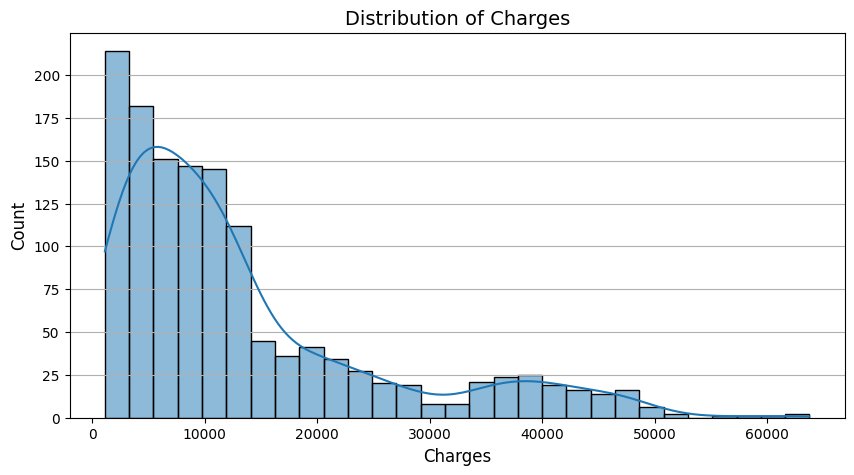

In [24]:
# creating a canvas
plt.figure(figsize=(10, 5))

# creating a pie plot to display distribution of children feature
sns.histplot(x = (cancer_us_census['charges']), kde = True)

# adding some cosmetics
plt.xlabel(xlabel='Charges', size=12)
plt.ylabel(ylabel='Count', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title(label='Distribution of Charges', size=14)

# Put a grid
plt.grid(axis ='y')

plt.show()


---
**<h4>Question :** Region wise customer distribution.</h4>

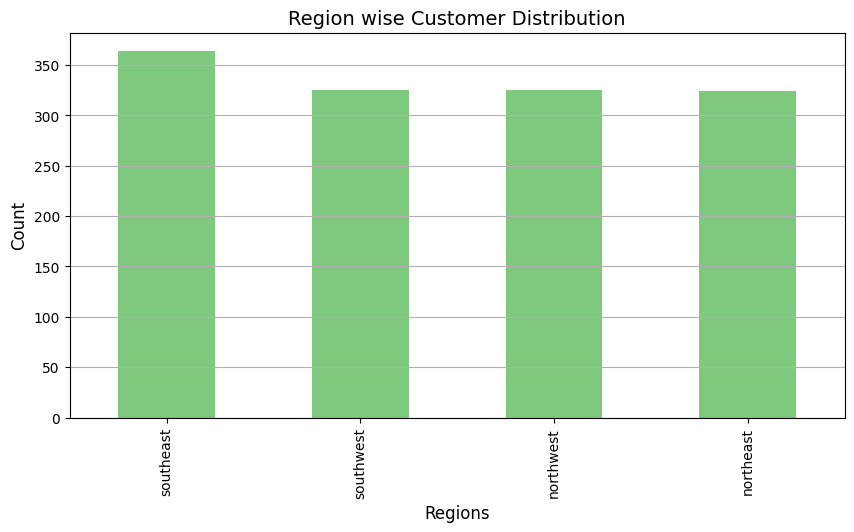

In [25]:
# creating a canvas
fig = plt.figure(figsize = (10, 5))

# plotting a bar plot for region
data['region'].value_counts().plot(kind = 'bar', cmap = 'Accent')

# set x, y labels of size 14, ticks of size 12 and title label of size 16.
plt.ylabel(ylabel='Count', size=12)
plt.xlabel(xlabel='Regions', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title(label='Region wise Customer Distribution', size=14)

# Put a grid
plt.grid(axis ='y')

# Display the plot
plt.show()


---
**<h4>Question :** Compare **bmi** vs **charges** of medical bills.</h4>

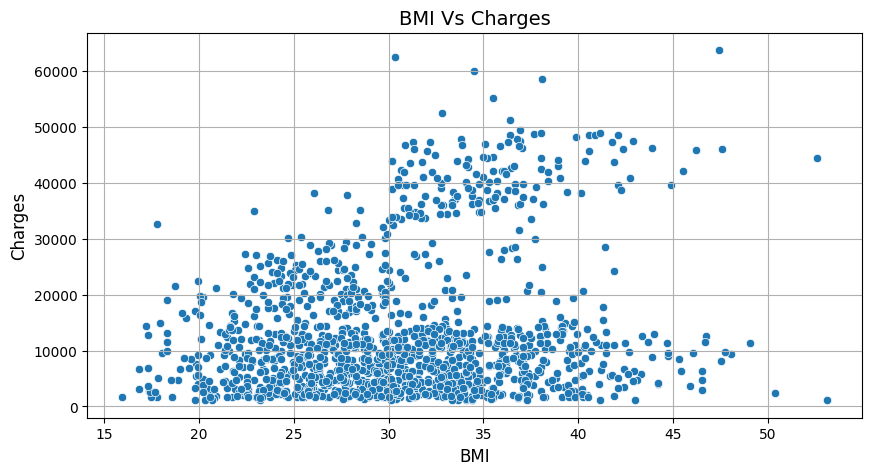

In [26]:
# creating a canvas
plt.figure(figsize=(10, 5))

# Plot a regression plot using sns.scatterplot between bmi and charges features.
sns.scatterplot(data = cancer_us_census, x = 'bmi', y = 'charges')

# set x, y labels of size 12, ticks of size 10 and title label of size 14.
plt.ylabel(ylabel='Charges', size=12)
plt.xlabel(xlabel='BMI', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title(label='BMI Vs Charges', size=14)

# Put a grid
plt.grid()

# Display the plot
plt.show()

<a name = Section7></a>

---
# **7. Data Preparation**

- Now we will **split** our **data** into **training** and **testing** part for model development.

---
Spliting the data into **dependent and independent** features.</h4>


In [27]:
X = cancer_us_census.drop(labels=['charges'], axis=1)
y = cancer_us_census['charges']

In [28]:
# spliting the data into train & test set and appling standard parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1069, 7) (1069,)
Testing Data Shape: (268, 7) (268,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this **section** we will develop a **Linear Regression** model, check it's **performance** using various performance **metrics**.

In [29]:
# INSTANTIATE
model = LinearRegression()

# FIT
model.fit(X_train, y_train)

# PREDICT
y_pred_test = model.predict(X_test)

y_pred_train = model.predict(X_train)

# Calculating Root Mean Squared Error
rmse = mean_squared_error(y_pred = y_pred_test, y_true = y_test, squared = False)  # SQUARE = FALSE -> RMSE, SQUARE = TRUE - MSE

# Calculating Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_pred = y_pred_test, y_true = y_test)*100

# Calculating R Squared for train and test and converting to percentage
r2_test = r2_score(y_test, y_pred_test)*100
r2_train = r2_score(y_train, y_pred_train)*100


print(f"RMSE = {rmse} | MAPE = {mape} | R2 Test Score = {r2_test} | R2 Train Score = {r2_train}")

RMSE = 5945.552150033019 | MAPE = 41.369681833040055 | R2 Test Score = 80.76276254978129 | R2 Train Score = 72.98574614602522


In [30]:
# copying the data for further analysis
df = cancer_us_census.copy()

In [31]:
# as the data is skewed, using the log function for better model prediction/ accuracy
df['charges'] = np.log(df['charges'])
df.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1,0,0,1
1,18,33.770,1,7.453302,0,0,1,0
2,28,33.000,3,8.400538,0,0,1,0
3,33,22.705,0,9.998092,0,1,0,0
4,32,28.880,0,8.260197,0,1,0,0


In [32]:
# further scalling the data using standard scaler method
def scale_data(data=None):
  sc = StandardScaler()
  scaled_data = sc.fit_transform(df)
  scaled_dataframe = pd.DataFrame(data=scaled_data, columns=df.columns)
  return scaled_dataframe

In [33]:
scaled_data = scale_data(data=df)
scaled_data.head()

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.442465,-0.453160,-0.909234,0.690636,1.969660,-0.565546,-0.611638,1.764609
1,-1.513722,0.509422,-0.079442,-1.793016,-0.507702,-0.565546,1.634955,-0.566698
2,-0.801150,0.383155,1.580143,-0.761567,-0.507702,-0.565546,1.634955,-0.566698
3,-0.444864,-1.305052,-0.909234,0.978014,-0.507702,1.768203,-0.611638,-0.566698
4,-0.516122,-0.292456,-0.909234,-0.914386,-0.507702,1.768203,-0.611638,-0.566698


In [34]:
# Further spliting the data into dependent and independent features
X = df.drop(labels=['charges'], axis=1)
y = df['charges']

In [35]:
# spliting the data into train & test set and appling standard parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1069, 7) (1069,)
Testing Data Shape: (268, 7) (268,)


In [36]:
# INSTANTIATE
model_scaled = LinearRegression()

# FIT
model_scaled.fit(X_train, y_train)

# PREDICT
y_pred_test_scaled = model_scaled.predict(X_test)
y_pred_train_scaled = model_scaled.predict(X_train)

# calculating RMSE (Root Mean Squared Error)
rmse_scaled = mean_squared_error(y_pred = y_pred_test_scaled, y_true = y_test, squared = False)  

# calculating MAPE (Mean Absolute Percentage Error)
mape_scaled = np.mean(np.abs((y_test - y_pred_test_scaled) / y_test)) * 100

# calculating R-Square
r2_test_scaled = r2_score(y_test, y_pred_test_scaled) * 100
r2_train_scaled = r2_score(y_train, y_pred_train_scaled) * 100

print(f"RMSE = {rmse_scaled} | MAPE = {mape_scaled} | R2 Test Score = {r2_test_scaled} | R2 Train Score = {r2_train_scaled}")

RMSE = 0.39819841730928224 | MAPE = 2.8942840841086688 | R2 Test Score = 82.91689437495603 | R2 Train Score = 74.77249642314013


<a name = Section9></a>

---
# **9. Conclusion**
---

- We have **analyzed** and understood the **different features** that can **influence** the **charges** of the **Medical insurance**.

- **smoker** and **age** plays an important role in **determining** the **charge** of the Medical bills.

- We have also built a **predictor** to **estimate** the **charge** based on those **influential factors**.

- The model **performs decently** as shown by the **evaluation metrics**.

- This can be leveraged for the **Insurance company** to **improve** their overall **profits**.

- As the data is less, **getting more records** can **improve** the model's **performance**.

- Other **regression** techniques can also be used to **compare** with this model performance.